## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and any library you will need

In [107]:
import numpy as np
import matplotlib.pyplot as plt 
# %matplotlib inline

#### Read RegData csv file into numpy array 

In [108]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [109]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [110]:
X = data[:,0]
y = data[:, 1]

#### Explore your data

In [111]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [112]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

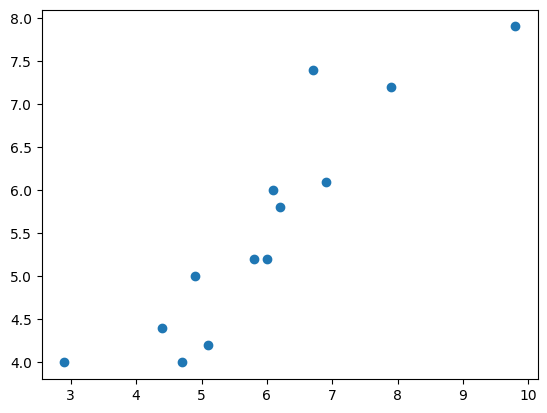

In [19]:
plt.scatter(X,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [22]:
np.size(y)

13

In [ ]:

theta_0 = 0
theta_1 = 0
LR = 0.001

In [89]:
theta_0

0

In [90]:
theta_1

0

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

In [92]:
theta_0 + theta_1 * X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [93]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [95]:
(theta_0 + theta_1 * X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
print("(MAE, not MSE) Error Vector:",
    (
        (theta_0 + theta_1 * X - y)
    
    )
     
)
print("(MSE) j = " , np.sum(( theta_0 + theta_1 * X -y)**2)/(2*len(y)))

(MAE, not MSE) Error Vector: [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
(MSE) j =  16.305384479692318


Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [115]:
def d_theta_0(theta_0, theta_1, X, y):
    return (np.sum(((theta_0 + theta_1 * X - y) ))/np.size(X))

def d_theta_1(theta_0, theta_1, X, y):
    return (np.sum(((theta_0 + theta_1 * X - y) @X ))/np.size(X))

In [116]:
print("d_theta_0 : ",  d_theta_0( theta_0, theta_1, X, y))
print("d_theta_1 : ", d_theta_1( theta_0, theta_1, X, y))

d_theta_0 :  -5.56923073976923
d_theta_1 :  -35.04384604321538


### Step5: Update the parameters (simultaneously).

In [100]:
theta_0

0

In [103]:
theta_0_new =  theta_0 - LR *  d_theta_0( theta_0, theta_1, X, y)
theta_0_new

0.00556923073976923

In [104]:
theta_1_new =  theta_1 - LR *  d_theta_1( theta_0, theta_1, X, y)
theta_1_new

0.03504384604321538

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [124]:
EPOCHS = 500
TOLERANCE = 0.001
LR = 0.01
theta_0_new = 0
theta_1_new = 0
for i in range(EPOCHS):
    print(f"****************** Iteration {i} ********************")
    print('h(x): ', (theta_0_new + theta_1_new * X))
    print('MAE Error Vector :')
    print( (theta_0_new + theta_1_new * X - y))
    print("j = ", np.sum(( theta_0_new + theta_1_new * X -y)**2)/(2*len(y)))
    grad_vector = np.array([d_theta_0( theta_0_new, theta_1_new, X, y),d_theta_1( theta_0_new, theta_1_new, X, y)])
    print('Gradient Vector:', grad_vector)
    print('Gradient Vector Norm:', np.linalg.norm(grad_vector))
    theta_0_new =  theta_0_new - LR *  d_theta_0( theta_0_new, theta_1_new, X, y)
    theta_1_new =  theta_1_new - LR *  d_theta_1( theta_0_new, theta_1_new, X, y)
    print('theta_0_new : ', theta_0_new)
    print('theta_1_new : ', theta_1_new)
    if (abs(theta_1 - theta_1_new) < TOLERANCE or i == EPOCHS) : 
        break
    

    

****************** Iteration 0 ********************
h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
MAE Error Vector :
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j =  16.305384479692318
Gradient Vector: [ -5.56923074 -35.04384604]
Gradient Vector Norm: 35.483622652336
theta_0_new :  0.0556923073976923
theta_1_new :  0.34712262612614114
****************** Iteration 1 ********************
h(x):  [1.06234796 2.38141384 1.75659321 2.79796109 3.45749411 2.45083846
 2.17314029 2.20785252 2.13842806 1.82601767 1.68716858 1.5830319
 2.06900361]
MAE Error Vector :
[-2.93765204 -5.01858626 -3.24340679 -4.40203872 -4.44250599 -3.64916144
 -3.82685971 -3.59214767 -3.06157174 -2.37398214 -2.31283142 -2.8169682
 -3.1309962 ]
j =  6.246573378193393
Gradient Vector: [ -3.44682372 -21.46499507]
Gradient Vector Norm: 21.739977164320315
theta_0_new :  0.09016054457156703
theta_1_new :  0.559

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [127]:
print('h(x) = y_predict: ', theta_0_new + theta_1_new * X)
print('y_actual: ', y)

h(x) = y_predict:  [2.95017238 6.12975672 4.62363795 7.1338363  8.72362868 6.29710352
 5.62771713 5.71139033 5.54404393 4.79098435 4.45629115 4.20527156
 5.37669754]
y_actual:  [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

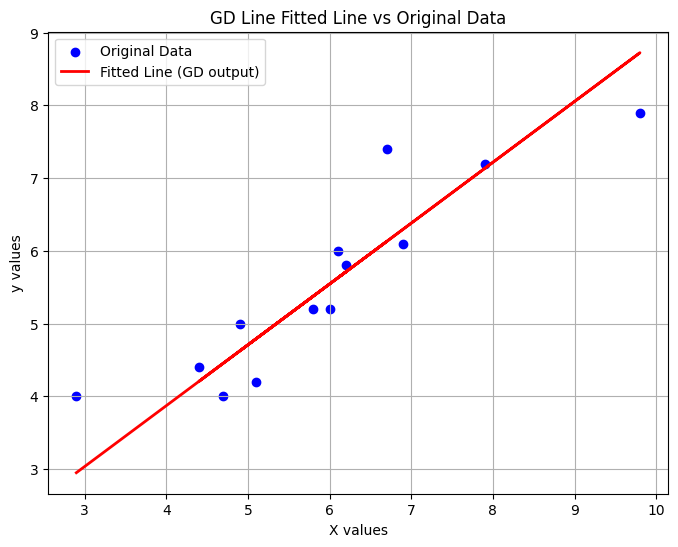

In [129]:
y_pred = theta_0_new + theta_1_new * X
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line (GD output)')
plt.title('GD Line Fitted Line vs Original Data')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.grid(True)

plt.show()

#### Use R2 score to evaluate LR equation output
https://www.youtube.com/watch?v=KccCy0hu-dM

measuring the proportion of variance in the dependent variable that is predictable from the independent variable. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, r2_score may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an R^2 score of 0.0.

In [ ]:
ss_res = np.sum((y- y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)

r2_manual = 1 - (ss_res / ss_tot)

print(f"Manual R^2 score: {r2_manual}")

Manual R^2 score: 0.7843313121053302


## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

In [132]:
EPOCHS = 500
TOLERANCE = 0.001
LR = 0.01
theta_0_new = 0
theta_1_new = 0
saved_loss = np.zeros(EPOCHS)
for i in range(EPOCHS):
    print(f"****************** Iteration {i} ********************")
    print('h(x): ', (theta_0_new + theta_1_new * X))
    print('MAE Error Vector :')
    print( (theta_0_new + theta_1_new * X - y))
    saved_loss[i] = np.sum(( theta_0_new + theta_1_new * X -y)**2)/(2*len(y))
    print("j = ", saved_loss[i])
    grad_vector = np.array([d_theta_0( theta_0_new, theta_1_new, X, y),d_theta_1( theta_0_new, theta_1_new, X, y)])
    print('Gradient Vector:', grad_vector)
    print('Gradient Vector Norm:', np.linalg.norm(grad_vector))
    theta_0_new =  theta_0_new - LR *  d_theta_0( theta_0_new, theta_1_new, X, y)
    theta_1_new =  theta_1_new - LR *  d_theta_1( theta_0_new, theta_1_new, X, y)
    print('theta_0_new : ', theta_0_new)
    print('theta_1_new : ', theta_1_new)
    if (abs(theta_1 - theta_1_new) < TOLERANCE or i == EPOCHS) : 
        break
    

    

****************** Iteration 0 ********************
h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
MAE Error Vector :
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j =  16.305384479692318
Gradient Vector: [ -5.56923074 -35.04384604]
Gradient Vector Norm: 35.483622652336
theta_0_new :  0.0556923073976923
theta_1_new :  0.34712262612614114
****************** Iteration 1 ********************
h(x):  [1.06234796 2.38141384 1.75659321 2.79796109 3.45749411 2.45083846
 2.17314029 2.20785252 2.13842806 1.82601767 1.68716858 1.5830319
 2.06900361]
MAE Error Vector :
[-2.93765204 -5.01858626 -3.24340679 -4.40203872 -4.44250599 -3.64916144
 -3.82685971 -3.59214767 -3.06157174 -2.37398214 -2.31283142 -2.8169682
 -3.1309962 ]
j =  6.246573378193393
Gradient Vector: [ -3.44682372 -21.46499507]
Gradient Vector Norm: 21.739977164320315
theta_0_new :  0.09016054457156703
theta_1_new :  0.559

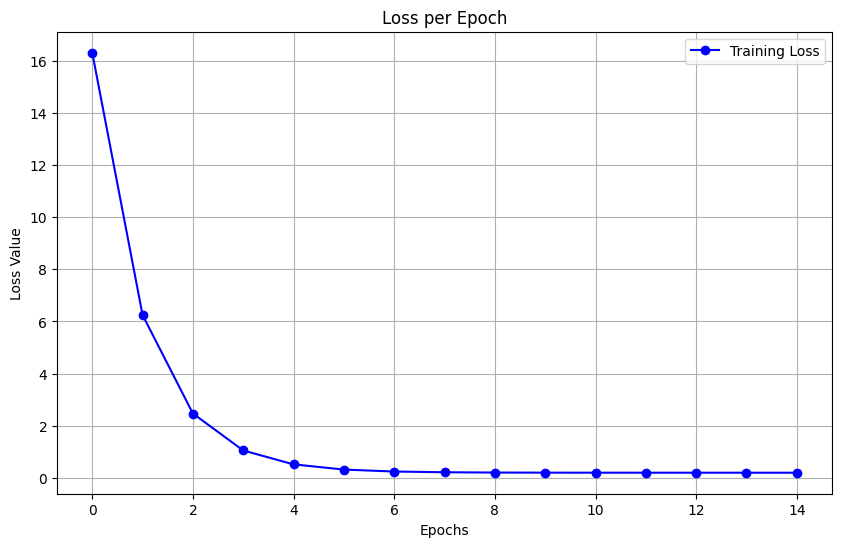

In [135]:
plt.figure(figsize=(10, 6))

# Plot training loss with 'o' markers (circles)
plt.plot(saved_loss[:15], label='Training Loss', marker='o', linestyle='-', color='b')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend() # Show the legend with labels
plt.grid(True) # Add a grid for readability

# Display the plot
plt.show()

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [136]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [137]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [138]:
X2 = data2[:, :3]
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [139]:
y2 = data2[:, -1]
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

y = X_concat_with_bias @ Theta

In [159]:
m = len(X2)  
X2_with_bias = np.c_[np.ones((m, 1)), X2]  
theta = np.zeros((m, 1)) 

print("X2 with bias:")
print(X2_with_bias)
print("Initial Theta")
print(theta)
print('shapes ', X2.shape, y2.shape)

X2 with bias:
[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]
Initial Theta
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
shapes  (25, 3) (25, 1)


In [160]:
m = len(X2)  
X2_with_bias = np.c_[np.ones((m, 1)), X2] 
theta = np.zeros((X2_with_bias.shape[1], 1)) 

EPOCHS = 500
TOLERANCE = 0.001
LR = 0.0001

saved_loss = np.zeros(EPOCHS)

for i in range(EPOCHS):
    print(f"****************** Iteration {i} ********************")
    print('h(x): ', np.dot(X2_with_bias, theta))
    print('MAE Error Vector :')
    print( (np.dot(X2_with_bias, theta) - y2))
    saved_loss[i] = np.sum(( np.dot(X2_with_bias, theta) - y2)**2)/(2*m)
    print("j = ", saved_loss[i])
    grad_vector = np.dot(X2_with_bias.T, (np.dot(X2_with_bias, theta) - y2))/m
    print('Gradient Vector (for each feature):' )
    print(np.linalg.norm(grad_vector))
    print(grad_vector)
    print('Gradient Vector Norm:')
    theta_new = theta - LR * grad_vector
    print("Thetas_new")
    print(theta_new)
    
    if (np.linalg.norm(theta - theta_new) < TOLERANCE or i == EPOCHS) : 
        break
    theta = theta_new

****************** Iteration 0 ********************
h(x):  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
MAE Error Vector :
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
j =  13405.98
Gradient Vector (for each feature):
22917.5459892197
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
Gradient Vector Norm:
Thetas_new
[[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]
****************** Iteration 1 ********************
h(x):  [[301.650244]
 [362.560348]
 [357.234064]
 [389.057244]
 [276.510624]
 [203.864004]
 [291.22502 ]
 [215.899264]
 [338.842264]
 [313.855728]
 [280.579308]
 [276.659996]
 [369.069972]
 [306.802308]
 [292.564588]
 [367.915192]
 [292.187588]
 [349.498828]
 [351.854372]
 [314.82572 ]
 [34

#### Predict y values using the LR equation 
##### X@thetas

In [165]:
print("h2(x) = y2_predict: ", X2_with_bias @ theta)

h2(x) = y2_predict:  [[153.4865763 ]
 [185.08167899]
 [182.01804224]
 [198.64918661]
 [140.96040017]
 [104.63930788]
 [149.14720435]
 [111.18183397]
 [173.62260581]
 [161.79409596]
 [143.44686177]
 [141.86866841]
 [187.63225562]
 [155.41988885]
 [149.96934339]
 [188.15676971]
 [147.69724103]
 [179.11520992]
 [178.72089557]
 [159.92292872]
 [174.83708949]
 [174.00063297]
 [166.52294905]
 [153.77847426]
 [191.5237584 ]]


In [166]:
print('y2 is ' , y2)

y2 is  [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Plot loss vs. iterations

stopped at epoch  197


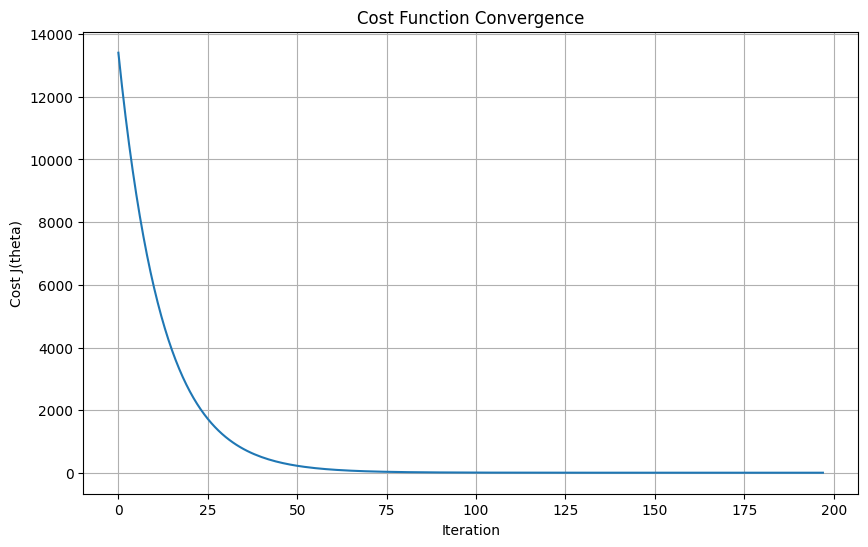

In [167]:
print("stopped at epoch ", i)
plt.figure(figsize=(10, 6))
plt.plot(range(i+1), saved_loss[:i+1])
plt.xlabel('Iteration')
plt.ylabel('Cost J(theta)')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

#### Use R2 score to evaluate LR equation output

Residual Sum of Squares (SS_res): 219.2642
Total Sum of Squares (SS_tot): 13874.9600
R² Score: 0.984197



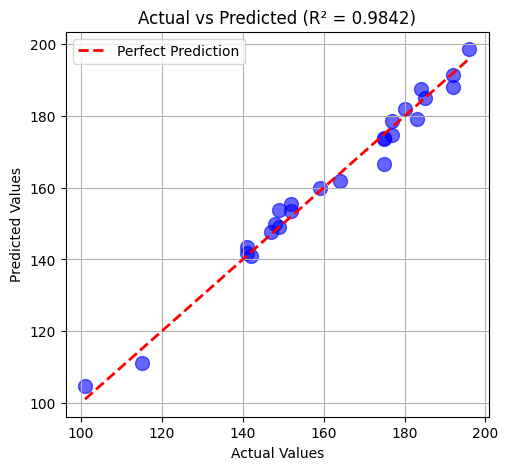

In [174]:
# Calculate R² Score (Coefficient of Determination)

# Make predictions using final theta
y2_pred = np.dot(X2_with_bias, theta)

# Calculate R² Score
# R² = 1 - (SS_res / SS_tot)
# where SS_res = sum of squared residuals
#       SS_tot = total sum of squares

# Residual Sum of Squares (RSS or SS_res)
ss_res = np.sum((y2 - y2_pred)**2)

# Total Sum of Squares (TSS or SS_tot)
ss_tot = np.sum((y2 - np.mean(y2))**2)

# R² Score
r2_score = 1 - (ss_res / ss_tot)

print(f"Residual Sum of Squares (SS_res): {ss_res:.4f}")
print(f"Total Sum of Squares (SS_tot): {ss_tot:.4f}")
print(f"R² Score: {r2_score:.6f}")
print()



# Visualize predictions vs actual
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y2, y2_pred, alpha=0.6, color='blue', s=100)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score:.4f})')
plt.legend()
plt.grid(True)


